**本节介绍线性神经网络**


In [211]:
# 导入包
import torch
import random
import matplotlib.pyplot as plt
import numpy as np

一，仅使用torch中的自动微分与tensor的快速计算来实现训练线性网络

In [219]:
# 生成简单线性数据集
def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(features.shape,labels.shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


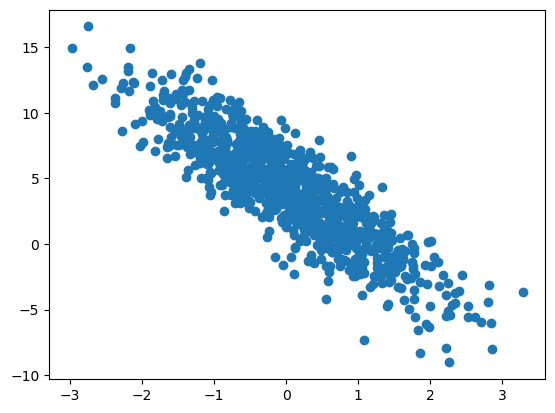

In [213]:
plt.scatter(features[:,1],labels)
plt.show()

**下面是我自己实现的训练，学习网络**

In [214]:
# 随机获取batch_size数据
def get_batch(batch_size,features,labels):
    num = len(features)
    index = torch.randperm(num)
    return features[index[:batch_size]],labels[index[:batch_size]]

# 定义前向传播
def forward(x):
    return x.mm(train_w) + train_b

# 定义损失函数
def Square_loss(x,labels):
    y = forward(x)
    loss = (y - labels).pow(2).sum()
    return loss

train_w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
train_b = torch.zeros(1, requires_grad=True)

print(train_w.shape,train_b.shape)
print(train_w)

torch.Size([2, 1]) torch.Size([1])
tensor([[ 0.0041],
        [-0.0090]], requires_grad=True)


In [215]:
# 设置超参数
train_times = 1000
batch_size = 10
learning_rate = 0.03

for i in range(train_times):
    features_batch,labels_batch = get_batch(batch_size,features,labels)
    loss = Square_loss(features_batch,labels_batch)
    if (i % 100 == 0):
        print(f"loss = {loss.sum()} in epoch {int(i/100)}\n")
    # loss.sum().backward()
    loss.backward()

    with torch.no_grad():
        train_w -= learning_rate * train_w.grad
        train_b -= learning_rate * train_b.grad
        train_w.grad.zero_()
        train_b.grad.zero_()

loss = 403.633544921875 in epoch 0

loss = 0.0006047318456694484 in epoch 1

loss = 0.0009547993540763855 in epoch 2

loss = 0.0014354396844282746 in epoch 3

loss = 0.0018138709710910916 in epoch 4

loss = 0.0013617458753287792 in epoch 5

loss = 0.0007679100963287055 in epoch 6

loss = 0.001016821595840156 in epoch 7

loss = 0.0011300536571070552 in epoch 8

loss = 0.0016990893054753542 in epoch 9



In [216]:
print(f'w的估计误差: {true_w - train_w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - train_b}')

w的估计误差: tensor([-0.0025, -0.0032], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0059], grad_fn=<RsubBackward1>)


**收获：batch_size十分影响训练！！！**

二，下面使用torch中的nn(Neural networks的缩写)API简化模型的建立

In [220]:
from torch.utils import data
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))


In [221]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)


In [225]:
# 访问0层的权重参数
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

# 定义损失函数
loss = nn.MSELoss()

# 设置优化方法
trainer = torch.optim.SGD(net.parameters(), lr=0.03)



In [226]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')



epoch 1, loss 0.000290
epoch 2, loss 0.000104
epoch 3, loss 0.000103


In [227]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)


w的估计误差： tensor([0.0003, 0.0008])
b的估计误差： tensor([6.1512e-05])


**结论：发现nn实现神经网络非常方便，就像是在搭积木！**